In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mik_tools import matrix_to_pose, pose_to_matrix, tr, transform_matrix_inverse, get_dataset_path
from mik_tools.camera_tools.cnos import CNOS
from mik_tools.camera_tools.camera_utils import compute_camera_pose
from mik_tools.rendering_tools import Camera
from mik_tools.rendering_tools import VisionSceneRenderer

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
shape_id = 'strawberry'
mesh_path = '/home/mik/robot_ws/src/megapose6d_ros/meshes/strawberry/nontextured.ply'

w_pose_cf = compute_camera_pose(np.array([.2, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
K = np.array([[600., 0., 320.], [0., 600., 240.], [0., 0., 1.]])
camera = Camera(w_pose_cf)
vision_cameras = [camera]
vs_renderer = VisionSceneRenderer(shape_id=shape_id, vision_cameras=vision_cameras, mesh_path=mesh_path, mesh_scale=0.001)

In [10]:
w_pose_cf.shape

(7,)

In [11]:
# test visual rendering:

# sample a set of random poses:
num_poses = 300
pos = np.random.rand(num_poses, 3) * 0.01
rpys = np.random.uniform(-np.pi, np.pi, (num_poses, 3))
poses = np.concatenate([pos, rpys], axis=1)
w_X_of = pose_to_matrix(poses)
vision_obs = vs_renderer.render_vision_color(w_X_of=w_X_of)


100%|██████████| 300/300 [00:00<00:00, 890.40it/s]


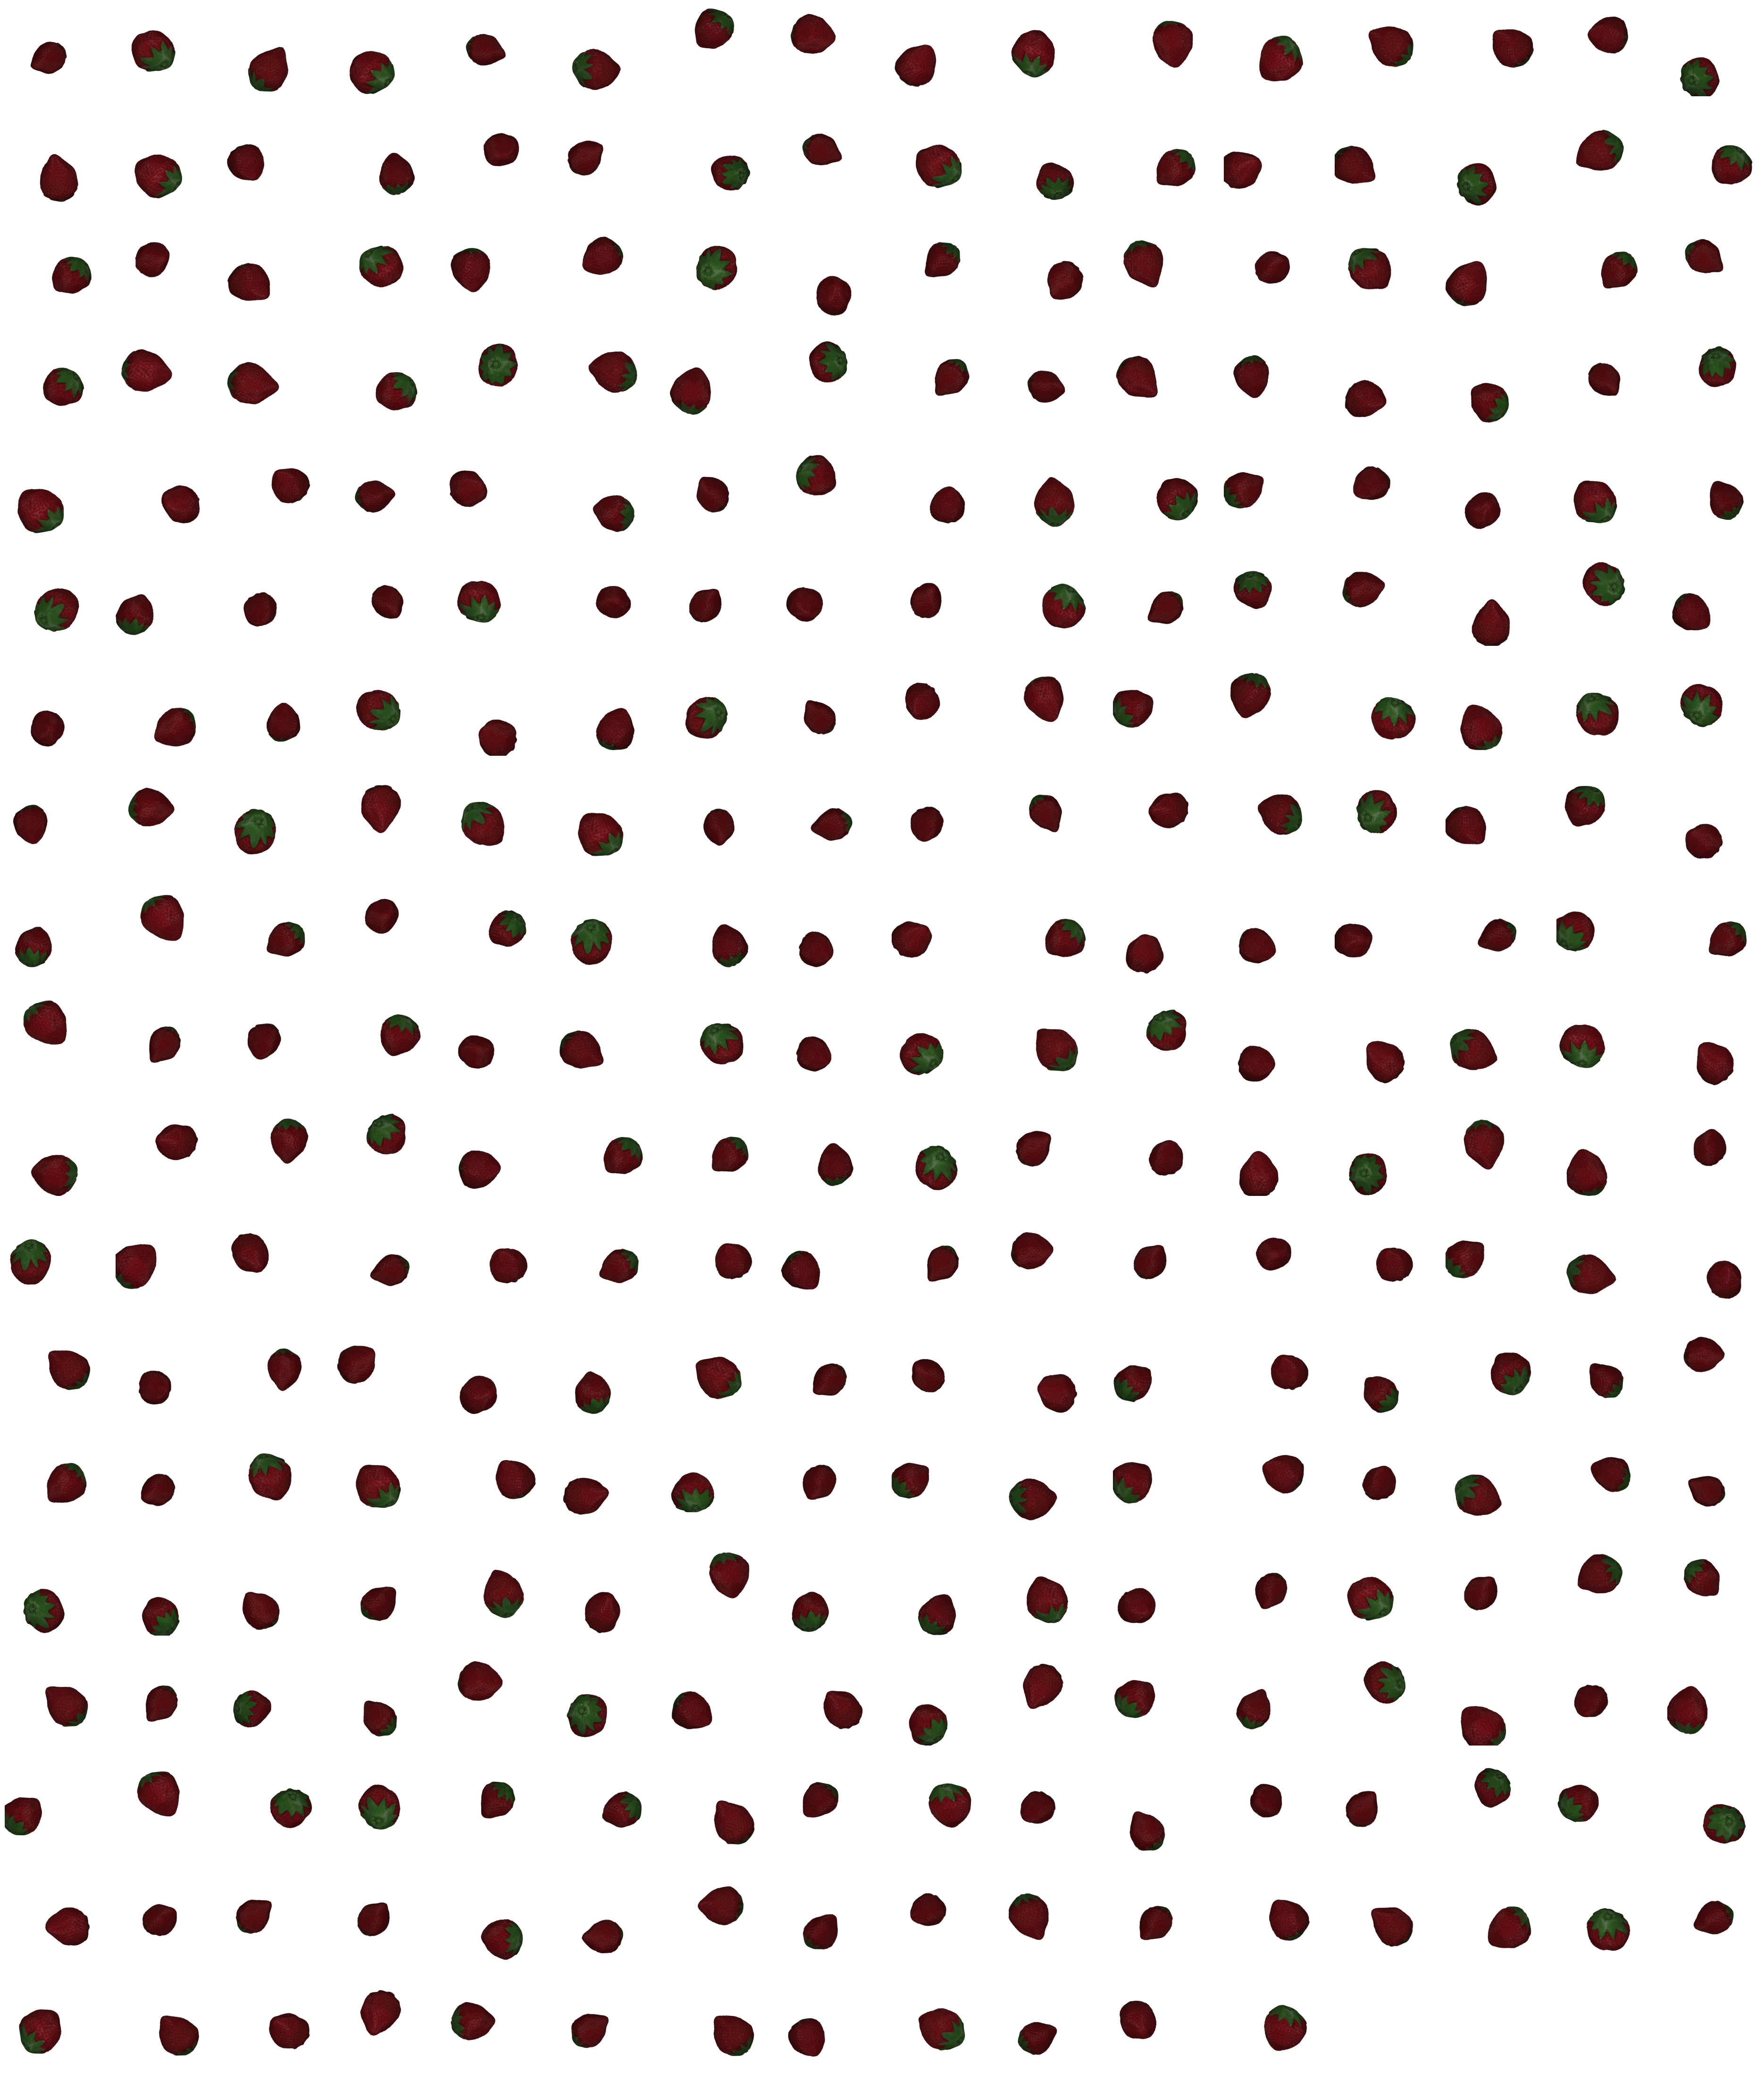

In [13]:
num_plots = vision_obs[0].shape[1:]

num_cols = 16 # np.sqrt(num_poses).astype(int)
num_rows = np.ceil(num_poses / num_cols).astype(int)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 3*num_rows))
for i, ax_i in enumerate(axes.flatten()):
    if i < num_poses:
        ax_i.imshow(np.flip(vision_obs[0][i].transpose(1, 2, 0),axis=-1))
    ax_i.axis('off')
# plt.imshow(vision_obs[0].transpose(1, 2, 0))

In [57]:
vision_obs[0].dtype

dtype('uint8')

In [7]:
# Try the same but with mik cube:

shape_id = 'rubik_block'
mesh_path = '/home/mik/robot_ws/src/megapose6d_ros/meshes/rubik_block_test/rubik_block.ply'

vs_renderer = VisionSceneRenderer(shape_id=shape_id, vision_cameras=vision_cameras, mesh_path=mesh_path, mesh_scale=0.002)

In [8]:
num_poses = 100
pos = np.random.rand(num_poses, 3) * 0.01
rpys = np.random.uniform(-np.pi, np.pi, (num_poses, 3))
poses = np.concatenate([pos, rpys], axis=1)
w_X_of = pose_to_matrix(poses)
vision_obs = vs_renderer.render_vision_color(w_X_of=w_X_of)

100%|██████████| 100/100 [00:00<00:00, 376.45it/s]


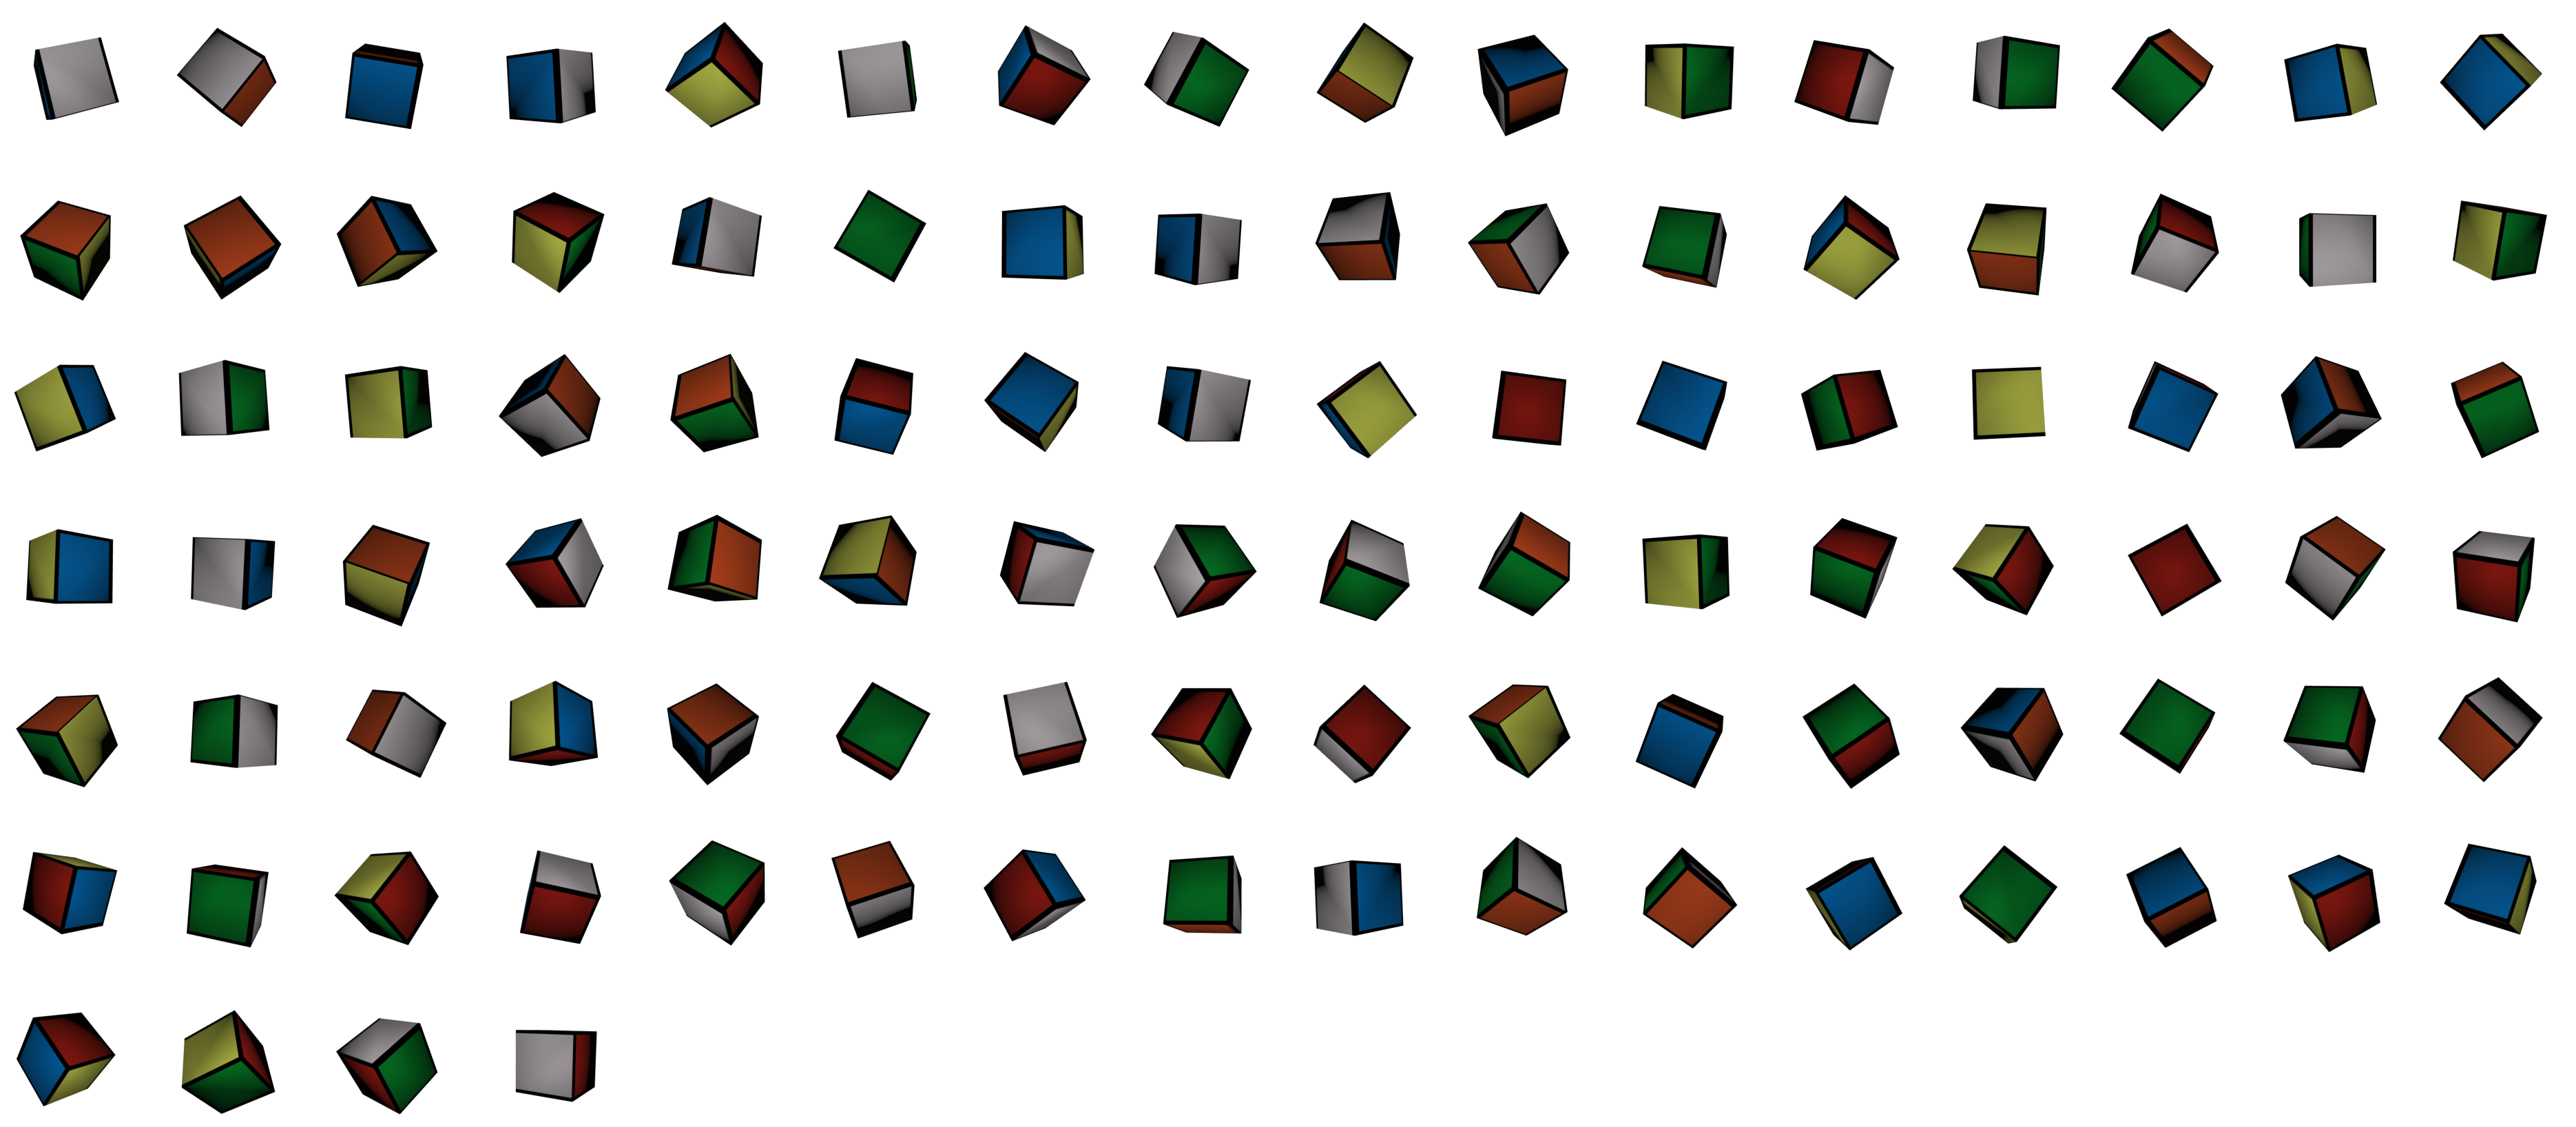

In [9]:
num_plots = vision_obs[0].shape[1:]

num_cols = 16 # np.sqrt(num_poses).astype(int)
num_rows = np.ceil(num_poses / num_cols).astype(int)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 3*num_rows))
for i, ax_i in enumerate(axes.flatten()):
    if i < num_poses:
        ax_i.imshow(np.flip(vision_obs[0][i].transpose(1, 2, 0),axis=-1))
    ax_i.axis('off')
# plt.imshow(vision_obs[0].transpose(1, 2, 0))